In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

In [181]:
a="3274904_3274928"
bc09=pd.read_csv(r"Z:\5hmC_ONT_project_data_and_analysis\220922_5hmC_trainingh\barcode09_epi_basecaller_outputs\101217-3303900\aligned_reads_barcode09_forward_" + a + ".eventalign.tsv", header=None, sep="\t")
bc10=pd.read_csv(r"Z:\5hmC_ONT_project_data_and_analysis\220922_5hmC_trainingh\barcode10_epi_basecaller_outputs\101217-3303900\aligned_reads_barcode10_forward_" + a + ".eventalign.tsv", header=None, sep="\t")
bc11=pd.read_csv(r"Z:\5hmC_ONT_project_data_and_analysis\220922_5hmC_trainingh\barcode11_epi_basecaller_outputs\101217-3303900\aligned_reads_barcode11_forward_" + a + ".eventalign.tsv", header=None, sep="\t")
bc12=pd.read_csv(r"Z:\5hmC_ONT_project_data_and_analysis\220922_5hmC_trainingh\barcode12_epi_basecaller_outputs\101217-3303900\aligned_reads_barcode12_forward_" + a + ".eventalign.tsv", header=None, sep="\t")
bc09[["ones"]]=1
bc10[["ones"]]=1
bc11[["ones"]]=1
bc12[["ones"]]=1
grouped09=bc09.groupby([1,3]).agg({8:'sum', "ones":'sum',6:'mean'})
grouped10=bc10.groupby([1,3]).agg({8:'sum', "ones":'sum',6:'mean'})
grouped11=bc11.groupby([1,3]).agg({8:'sum', "ones":'sum',6:'mean'})
grouped12=bc12.groupby([1,3]).agg({8:'sum', "ones":'sum',6:'mean'})
grouped09= grouped09.reset_index()
grouped10= grouped10.reset_index()
grouped11= grouped11.reset_index()
grouped12= grouped12.reset_index()
mapped09=grouped09.groupby([1]).agg({8:'mean', "ones":'mean',6:'mean'})
for index, row in grouped09.iterrows():
    grouped09.at[index,"current diff"]=(grouped09.loc[index,6])-(mapped09.loc[(grouped09.iloc[index,0]),6])
    grouped09.at[index,"dwell diff"]=(grouped09.loc[index,8])-(mapped09.loc[(grouped09.iloc[index,0]),8])
for index, row in grouped10.iterrows():
    grouped10.at[index,"current diff"]=(grouped10.loc[index,6])-(mapped09.loc[(grouped10.iloc[index,0]),6])
    grouped10.at[index,"dwell diff"]=(grouped10.loc[index,8])-(mapped09.loc[(grouped10.iloc[index,0]),8])
for index, row in grouped11.iterrows():
    grouped11.at[index,"current diff"]=(grouped11.loc[index,6])-(mapped09.loc[(grouped11.iloc[index,0]),6])
    grouped11.at[index,"dwell diff"]=(grouped11.loc[index,8])-(mapped09.loc[(grouped11.iloc[index,0]),8])
for index, row in grouped12.iterrows():
    grouped12.at[index,"current diff"]=(grouped12.loc[index,6])-(mapped09.loc[(grouped12.iloc[index,0]),6])
    grouped12.at[index,"dwell diff"]=(grouped12.loc[index,8])-(mapped09.loc[(grouped12.iloc[index,0]),8])

In [182]:
grouped09["Modification"]="C"
grouped10["Modification"]="hmC"
grouped11["Modification"]="Glu-hmC"
grouped12["Modification"]="N3-Glu-hmC"

In [183]:
df=pd.concat([grouped09, grouped10, grouped11, grouped12])

In [184]:
a=df[1].unique()


In [185]:
a

array([3274905, 3274906, 3274907, 3274908, 3274909, 3274910, 3274911,
       3274912, 3274913, 3274914, 3274915, 3274916, 3274917, 3274918,
       3274919, 3274920, 3274921, 3274922, 3274923, 3274924, 3274925,
       3274926, 3274927], dtype=int64)

In [ ]:
fig = plt.figure(figsize=(24,16))
gs = gridspec.GridSpec(4, 6)
i=0
for key in a:
    pos-i-14
    plot = sns.jointplot(data=df.loc[df[1]==key], x='current diff', y='dwell diff', hue="Modification", alpha=0.3, s=5, linewidths=None, legend=False, marginal_kws={'common_norm':False})
    plot.ax_joint.axvline(x=0, color='k', linewidth=.5)
    plot.ax_joint.axhline(y=0, color='k', linewidth=.5)
    plot.ax_joint.set_xlim(-15,10)
    plot.ax_joint.set_ylim(-0.005,0.02)
   # plot.set_title(pos)
#    plot.tick_params(axis='both', which='major', labelsize=8)
    mgkey = SeabornFig2Grid(plot, fig, gs[i])
    i+=1
    print(key)
#gs = gs.annotate(stats.pearsonr, fontsize=10)
gs.tight_layout(fig)
    

3274905
3274906
3274907
3274908
3274909
3274910
3274911
3274912
3274913
3274914
3274915
3274916
3274917
3274918
3274919
3274920
3274921


-14
3274905
-13
3274906
-12
3274907
-11
3274908
-10
3274909
-9
3274910
-8
3274911
-7
3274912
-6
3274913
-5
3274914
-4
3274915
-3
3274916
-2
3274917
-1
3274918
0
3274919
1
3274920
2
3274921
3
3274922
4
3274923
5
3274924
6
3274925
7
3274926
8
3274927


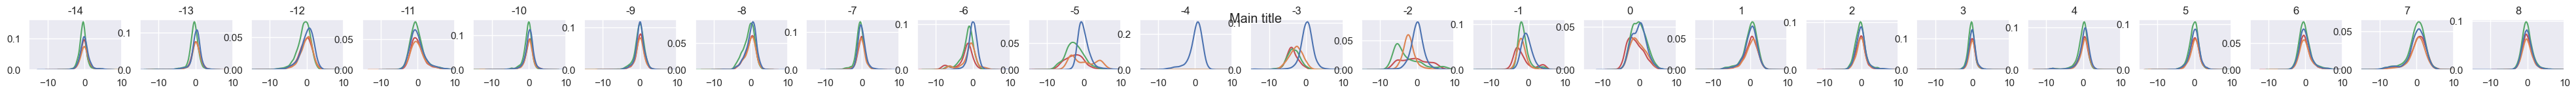

In [197]:

fig, axes = plt.subplots(1, 23, figsize=(50,1))
#fig.suptitle('Main title')
i=0
for key in a:
     pos=i-14
     ax=sns.kdeplot(data=df.loc[df[1]==key], x='current diff',hue="Modification", ax=axes[i], legend=False)
     ax.set(xlabel=None)
     ax.set_title(pos)
     ax.set(ylabel=None)
     ax.set_xlim(-15,10)
     i+=1



In [ ]:
 חחחחחחח יפה מאוד